## Human Resources Analysis and Prediction

In [2]:
# Necessary Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns

//anaconda/envs/dsienv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
#  Read in csv 
hr = pd.read_csv('/Users/Jordan/GitHub/DataResources/HR_why.csv', sep=';')

## Data Clean Up

In [4]:
#  working copy of the original dataframe 
hr2= hr.copy()

#  shows we have all 14,999 non-null values// clean data
hr2.info()
hr2.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
#  Used Label Encoder to make values for string values in job_type and salary columns 
# Gave string values encoded numbers
le = preprocessing.LabelEncoder()
hr2.salary = le.fit_transform(hr2["salary"])
hr2.sales = le.fit_transform(hr2["sales"])

# Exploratory Analysis 


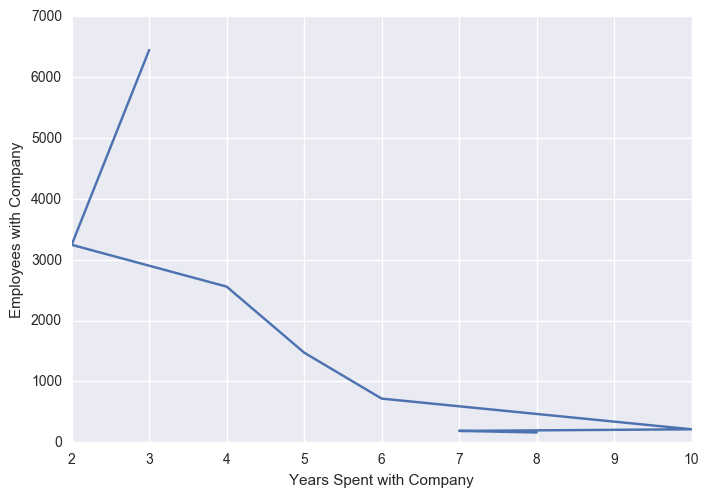

In [6]:
# Exploratory Analysis
# 4th year is when employees typically stay
plt.plot(hr2.time_spend_company.value_counts())
plt.xlabel("Years Spent with Company")
plt.ylabel("Employees with Company")
plt.show()



In [7]:
# Who is leaving? 
leavers= hr2.loc[hr["left"]==1]
# By category
print "Total Leavers: " ,len(leavers)
print "Satisfied Leavers: " ,len(leavers.loc[leavers['satisfaction_level']>=0.5])
print "Unsatisfied Leavers: " ,len(leavers.loc[leavers['satisfaction_level']<=0.5])
print "Really Unsatisfied Leavers: " ,len(leavers.loc[leavers['satisfaction_level']<=0.3])


Total Leavers:  3571
Satisfied Leavers:  1024
Unsatisfied Leavers:  2550
Really Unsatisfied Leavers:  947


In [8]:
# Surprisingly more "satisfied" leavers than "Unsatisfied" leavers
# Key employees
key_employees = hr2.loc[hr2['last_evaluation'] > 0.7].loc[hr2['time_spend_company'] >= 3]
print "How many key employees?" ,len(key_employees)

#  Key Employees that left
left_key_employees = leavers.loc[leavers['last_evaluation'] > 0.7].loc[leavers['time_spend_company'] >= 3]
print "How many key employees left?" ,len(left_key_employees)

#  30% of key employees decided to leave

How many key employees? 6123
How many key employees left? 1864


In [9]:
# High performance levels have what traits? 

high_pro_leavers = hr2.loc[hr2['left']==1].loc[hr2['salary']>=2].loc[hr2['time_spend_company']>=4]
print "How many High Performance Leavers? " ,len(high_pro_leavers)


How many High Performance Leavers?  732


In [10]:
# How many people were leaving after being promoted in the last 5 years? 
promoted_leavers = hr2.loc[hr2['promotion_last_5years']==1].loc[hr2['left']==1]
print len(promoted_leavers)

# Only 19 out of 14,999 or about 0.001%

19


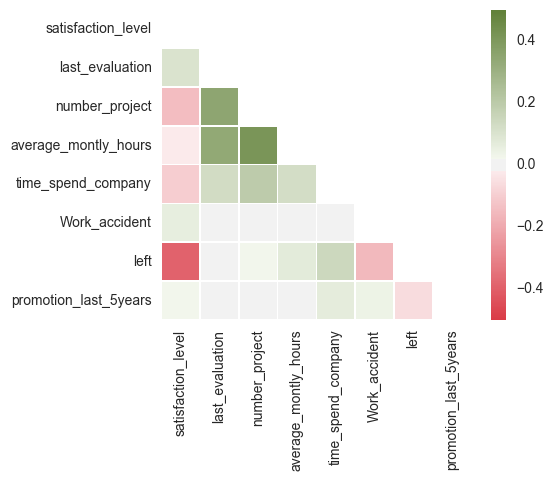

In [11]:
# Heatmapy to see correlations on original dataset

corr = hr.corr()
sns.set(style= 'white')

mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True

f , ax = plt.subplots(figsize=(5,4))
cmap= sns.diverging_palette(10,110, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .5, square = True,
            xticklabels= True, yticklabels = True, linewidth = .5, ax = ax)

plt.show()
# negative correlation with satisfaction level

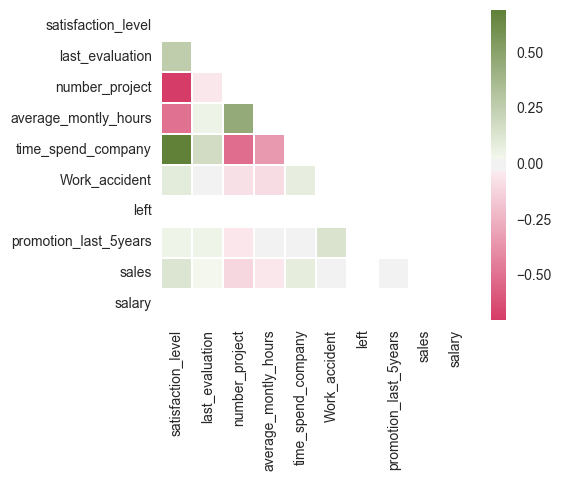

In [12]:
# heatmap to see correlations with high performance leavers

high_pro_leavers

corr = high_pro_leavers.corr()
sns.set(style= 'white')

mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True

f , ax = plt.subplots(figsize=(5,4))
cmap= sns.diverging_palette(1,110, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .5, square = True,
            xticklabels= True, yticklabels = True, linewidth = .75, ax = ax)

plt.show()

## Does the amount of time each person is working per day indicate if they will leave? 



In [13]:
# How many average hours per day does everyone work?
hr["average_daily_hours"] = hr["average_montly_hours"]/22

# Constructing a new measure will help judge if average daily hours are contributing 
hr["sat_idx"] = (hr.satisfaction_level * hr.average_daily_hours)/hr.last_evaluation

# Created a "stayed" column
hr["stayed"] = (hr["left"] - 1) * (-1)

In [37]:
# Created work_data_frame
hr_workdata= hr[['average_daily_hours','sales','sat_idx', 'left','stayed','salary', 'satisfaction_level']]
hr_workdata.head()

,average_daily_hours,sales,sat_idx,left,stayed,salary,satisfaction_level
0,7.136364,sales,5.116638,1,0,low,0.38
1,11.909091,sales,11.078224,1,0,medium,0.80
2,12.363636,sales,1.545455,1,0,medium,0.11
3,10.136364,sales,8.388715,1,0,low,0.72
4,7.227273,sales,5.142483,1,0,low,0.37


In [38]:

# cleaned and organized work_frame to look at totals for each category of occupation
# created 'daily hours' to have whole number bins

hr_workdata['daily_hours'] = hr_workdata['average_daily_hours']/1
hr_workdata['daily_hours'] = np.floor(hr_workdata['daily_hours'])
hr_workdata['daily_hours'] = hr_workdata['daily_hours'].astype('int')
hr_workdata.head()

/anaconda/envs/dsienv/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsienv/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dsienv/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

,average_daily_hours,sales,sat_idx,left,stayed,salary,satisfaction_level,daily_hours
0,7.136364,sales,5.116638,1,0,low,0.38,7
1,11.909091,sales,11.078224,1,0,medium,0.80,11
2,12.363636,sales,1.545455,1,0,medium,0.11,12
3,10.136364,sales,8.388715,1,0,low,0.72,10
4,7.227273,sales,5.142483,1,0,low,0.37,7


In [59]:
# created new groupby table to better visualize the new whole hour bins 

plswork= hr_workdata.groupby(['sales', 'daily_hours']).sum()
plswork

average_daily_hours      sat_idx  left  stayed  \
sales      daily_hours                                                   
IT         4                     111.045455    98.714889     0      24   
           5                     309.090909   251.111220    29      26   
           6                    1111.409091  1065.231330    54     117   
           7                    1521.409091  1386.933124    34     170   
           8                    1290.272727  1275.675740     1     151   
           9                    1173.090909  1269.977808     1     123   
           10                   1628.500000  1608.062817    21     133   
           11                   2104.045455  1790.695385    55     128   
           12                   1406.363636  1149.295237    35      79   
           13                    510.909091   126.999273    35       3   
           14                    112.000000    13.563758     8       0   
RandD      4                      51.772727    44.200275     0      11   
           5                     191.090909   179.297331     9      25   
           6                     842.227273   760.762293    31     100   
           7                     869.681818   820.348405    10     106   
           8                     797.954545   794.256374     0      94   
           9                     810.954545   775.454427     1      85   
           10                    925.318182   888.233054     8      80   
           11                   1609.409091  1473.437550    36     104   
           12                    964.181818   733.839509    20      58   
           13                    106.590909    27.985700     5       3   
           14                     14.000000     1.354839     1       0   
accounting 4                      28.045455    21.013803     0       6   
           5                     198.409091   169.481686    17      18   
           6                     985.681818   883.882684    58      93   
           7                     817.818182   787.681141    18      92   
           8                     641.363636   602.374205     4      72   
           9                     729.409091   638.952348     4      73   
           10                   1003.045455   913.761231    23      73   
           11                   1269.136364  1058.636729    29      81   
...                                     ...          ...   ...     ...   
sales      7                    4606.909091  4264.116311   138     484   
           8                    3650.818182  3589.826079     5     426   
           9                    4539.681818  4557.404203    15     464   
           10                   5710.636364  5552.541527    84     461   
           11                   7051.590909  6408.813610   199     416   
           12                   5180.818182  3967.563776   148     271   
           13                   1136.727273   216.958494    72      13   
           14                     98.272727    12.353444     7       0   
support    4                     166.545455   158.796567     0      36   
           5                     503.363636   458.491956    34      55   
           6                    2610.090909  2313.930150   161     241   
           7                    2210.954545  2054.363866    56     242   
           8                    2297.545455  2292.178698     9     263   
           9                    2233.227273  2137.001081    21     214   
           10                   2712.863636  2623.837675    53     207   
           11                   4275.000000  3729.528020   103     269   
           12                   2603.045455  2014.049121    68     143   
           13                    629.363636   176.268082    43       4   
           14                     98.454545    11.242853     7       0   
technical  4                     227.090909   221.004948     0      48   
           5                     555.636364   508.172340    43      56   
           6                

In [60]:
# need to orient numbers based on group size. 
plswork['left_percentage']=plswork['left']*100/(plswork['left']+ plswork['stayed'])
plswork['average_daily_hours']= plswork['average_daily_hours']/(plswork['left'] + plswork['stayed'])
plswork['average_sat'] = plswork['satisfaction_level']*100/(plswork['left'] + plswork['stayed'])
plswork

# Now I have a table that shows grouped categories of where everyone worked, how long each day,
# their interpreted satisfaction index and the left percentage.


average_daily_hours      sat_idx  left  stayed  \
sales      daily_hours                                                   
IT         4                       4.626894    98.714889     0      24   
           5                       5.619835   251.111220    29      26   
           6                       6.499468  1065.231330    54     117   
           7                       7.457888  1386.933124    34     170   
           8                       8.488636  1275.675740     1     151   
           9                       9.460411  1269.977808     1     123   
           10                     10.574675  1608.062817    21     133   
           11                     11.497516  1790.695385    55     128   
           12                     12.336523  1149.295237    35      79   
           13                     13.444976   126.999273    35       3   
           14                     14.000000    13.563758     8       0   
RandD      4                       4.706612    44.200275     0      11   
           5                       5.620321   179.297331     9      25   
           6                       6.429216   760.762293    31     100   
           7                       7.497257   820.348405    10     106   
           8                       8.488878   794.256374     0      94   
           9                       9.429704   775.454427     1      85   
           10                     10.514979   888.233054     8      80   
           11                     11.495779  1473.437550    36     104   
           12                     12.361305   733.839509    20      58   
           13                     13.323864    27.985700     5       3   
           14                     14.000000     1.354839     1       0   
accounting 4                       4.674242    21.013803     0       6   
           5                       5.668831   169.481686    17      18   
           6                       6.527694   883.882684    58      93   
           7                       7.434711   787.681141    18      92   
           8                       8.438995   602.374205     4      72   
           9                       9.472845   638.952348     4      73   
           10                     10.448390   913.761231    23      73   
           11                     11.537603  1058.636729    29      81   
...                                     ...          ...   ...     ...   
sales      7                       7.406606  4264.116311   138     484   
           8                       8.470576  3589.826079     5     426   
           9                       9.477415  4557.404203    15     464   
           10                     10.478232  5552.541527    84     461   
           11                     11.466001  6408.813610   199     416   
           12                     12.364721  3967.563776   148     271   
           13                     13.373262   216.958494    72      13   
           14                     14.038961    12.353444     7       0   
support    4                       4.626263   158.796567     0      36   
           5                       5.655771   458.491956    34      55   
           6                       6.492763  2313.930150   161     241   
           7                       7.419311  2054.363866    56     242   
           8                       8.446858  2292.178698     9     263   
           9                       9.503095  2137.001081    21     214   
           10                     10.434091  2623.837675    53     207   
           11                     11.491935  3729.528020   103     269   
           12                     12.336708  2014.049121    68     143   
           13                     13.390716   176.268082    43       4   
           14                     14.064935    11.242853     7       0   
technical  4                       4.731061   221.004948     0      48   
           5                       5.612489   508.172340    43      56   
           6                

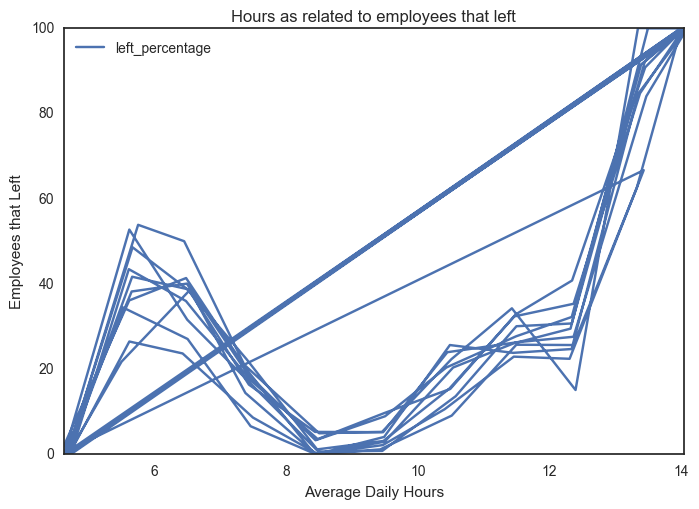

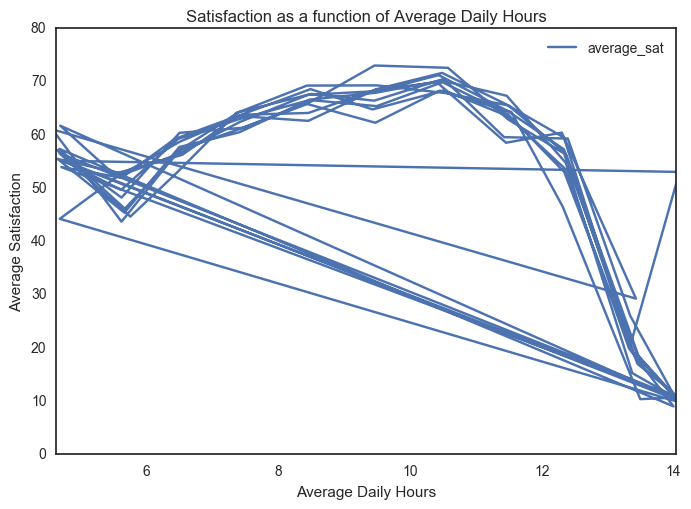

In [61]:
# Plotting the average daily hours worked, we can see that people that tended 
# to work more than 10 hours a day, started leaving in higher numbers over all job types.


# fig 2 Hours as related to employees that left
plswork.plot(x='average_daily_hours', y='left_percentage')
plt.title('Hours as related to employees that left')
plt.ylabel('Employees that Left')
plt.xlabel('Average Daily Hours')


# fig 1 satisfaction as a function of average daily hours
plswork.plot(x='average_daily_hours', y='average_sat' )
plt.title('Satisfaction as a function of Average Daily Hours')
plt.xlabel('Average Daily Hours')
plt.ylabel('Average Satisfaction')


plt.show()
